# Titanic 项目全流程

项目来源：[33题实战“泰坦尼克号生存预测”全流程](https://www.heywhale.com/mw/project/5e746b7a98d4a8002d2b0615)

## 获取数据

In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lark.tools import flags
from scipy.spatial.distance import canberra

In [448]:
train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")
y_test = pd.read_csv("titanic/ground_truth.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [449]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [450]:
train.shape, test.shape

((891, 12), (418, 11))

In [451]:
train, y_train = train.drop('Survived', axis=1), train['Survived']


In [452]:
# 查看数据结构
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


可以得到：Age, Cabin, Embarked有缺失值

In [453]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


test数据集中，Age, Cabin, Fare有缺失值

In [454]:
train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [455]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


利用`describe`获取数据的整体统计信息:
1. PassengerId：乘客的身份id 唯一值 离散型数据
2. Survived：本数据集的target，二元分类数据。key = 0, 1
3. Pclass：乘客的Ticket class（票务等级）， key = 1， 2，3 （一等，二等，三等）
4. Name：乘客的姓名， 字符串类型 unstructured data
5. Sex：乘客的性别，二元分类数据，key = male, female
6. Age：年龄，数值型数据，连续型数据
7. Sibsp：泰坦尼克号上的兄弟姐妹/配偶数量， 数值型数据，离散型数据
8. Parch：泰坦尼克号上父母/孩子的数量，数值型数据，离散型数据
9. Ticket：车票号码 唯一值
10. Fare：票价，数值型数据，连续型数据
11. Cabin：客舱号 /房间号
12. Embarked：起运港，分类数据。key = S, C, Q

从info可以得到， Age、Embarked和Cabin具有缺失值，test中，Fare也具有缺失值

## 数据预处理

### Age 处理

<Axes: ylabel='Frequency'>

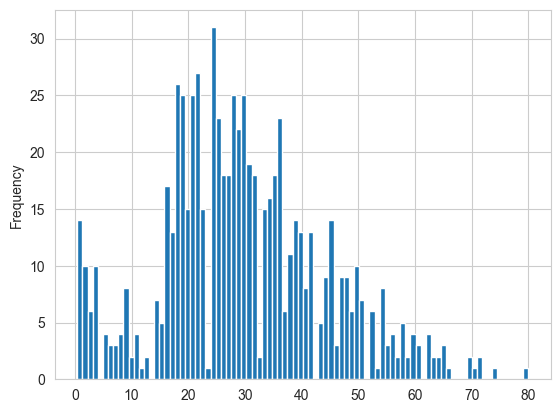

In [456]:
train['Age'].plot.hist(bins=88)

In [457]:
# 填充为平均值
train.fillna({'Age':train['Age'].median()}, inplace=True)
test.fillna({'Age':train['Age'].median()},inplace=True)

<BarContainer object of 88 artists>

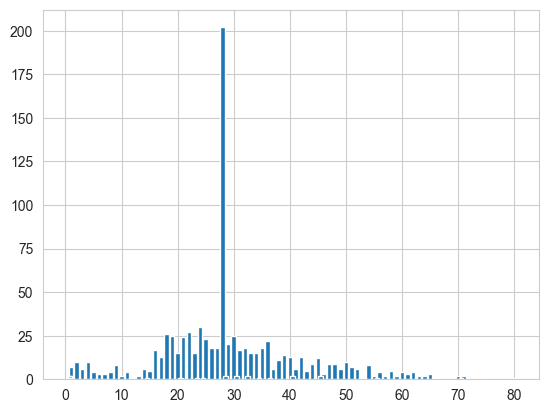

In [458]:
age = train['Age'].value_counts()
plt.bar(age.index, age.values)

### Carbin 处理

In [459]:
train['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [460]:
train['Cabin'] = train['Cabin'].fillna('U')
train['Cabin'] = train['Cabin'].apply(lambda x: x[0])

test['Cabin'] = test['Cabin'].fillna('U')
test['Cabin'] = test['Cabin'].apply(lambda x: x[0])

cabin = train['Cabin'].value_counts()
plt.bar(cabin.index, cabin.values)

# train['HasCabin'] = train['Cabin'].notnull().astype(int)
# test['HasCabin'] = test['Cabin'].notnull().astype(int)


In [461]:
cabin

### Embarked 处理

In [462]:
embarked = train['Embarked'].value_counts()
embarked

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [463]:
train['Embarked'] = train['Embarked'].fillna('S')

### Fare 处理

<Axes: ylabel='Frequency'>

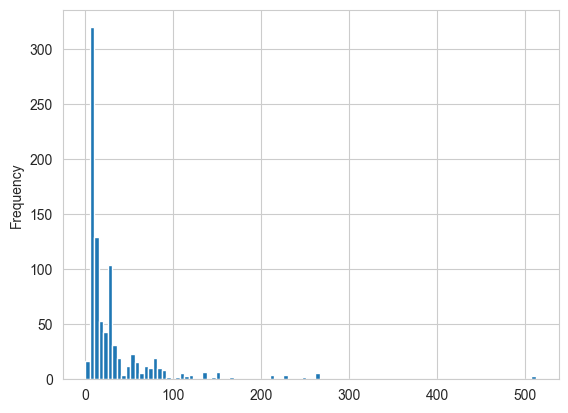

In [464]:
train['Fare'].plot.hist(bins=100)

In [465]:
train['Fare'].median(), train['Fare'].mean()

(14.4542, 32.204207968574636)

In [466]:
test.fillna({'Fare':train['Fare'].median()}, inplace=True)

## 特征工程

### 处理Name

Name的格式常常为XXX, title. ZZZ格式，其中title是一个人的头衔，通常有相应的含义，可以提取出来作为特征。

In [467]:
train['Name'].values

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [468]:
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test['Title'] = test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

rare_titles = ['Lady', 'the Countess','Capt','Col','Don','Dr',
               'Major','Rev','Sir','Jonkheer','Dona']
for df in [train, test]:
    df["Title"] = df["Title"].replace(rare_titles, "Rare")
    df["Title"] = df["Title"].replace({"Mlle":"Miss", "Ms":"Mrs", "Mme":"Mrs"})

## 头衔映射表
# titleDict = {
#                     "Capt":       "Officer",
#                     "Col":        "Officer",
#                     "Major":      "Officer",
#                     "Jonkheer":   "Royalty",
#                     "Don":        "Royalty",
#                     "Sir" :       "Royalty",
#                     "Dr":         "Officer",
#                     "Rev":        "Officer",
#                     "the Countess":"Royalty",
#                     "Dona":       "Royalty",
#                     "Mme":        "Mrs",
#                     "Mlle":       "Miss",
#                     "Ms":         "Mrs",
#                     "Mr" :        "Mr",
#                     "Mrs" :       "Mrs",
#                     "Miss" :      "Miss",
#                     "Master" :    "Master",
#                     "Lady" :      "Royalty"
#                     }

middles = train['Title'].value_counts()
middles

Title
Mr        517
Miss      184
Mrs       127
Master     40
Rare       23
Name: count, dtype: int64

In [469]:
# train['Title'] = train['Title'].map(lambda x: titleDict[x])
# test['Title'] = test['Title'].map(lambda x: titleDict[x])

对title进行编码

### 类别变量编码

1. Sex：二值化
2. Embarked：One-hot
3. Title：One-hot
4. Cabine: One-hot
5. Pclass: One-hot

In [470]:
# sex
train['Sex'] = (train['Sex']=='female').astype(int)
test['Sex'] = (test['Sex']=='female').astype(int)

In [471]:
# Embarked, Cabin

total = pd.concat([train, test])
total = pd.get_dummies(total, columns=['Embarked','Cabin','Pclass','Title'], drop_first=True)
train, test = total.iloc[:891,:], total.iloc[891:,:]

### 特征构造

In [472]:
train['FamilySize'] = train['SibSp'] + train['Parch']+1
test['FamilySize'] = test['SibSp'] + test['Parch']+1

/var/folders/vp/8_rd4_c56g3dpqb1167z6tqr0000gn/T/ipykernel_2805/386953321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['FamilySize'] = train['SibSp'] + train['Parch']+1
/var/folders/vp/8_rd4_c56g3dpqb1167z6tqr0000gn/T/ipykernel_2805/386953321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['FamilySize'] = test['SibSp'] + test['Parch']+1


In [473]:
train.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,HasCabin,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,FamilySize
0,1,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,False,True,False,True,False,True,False,False,2
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,False,False,False,False,False,False,True,False,2
2,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,False,True,False,True,True,False,False,False,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,False,True,False,False,False,False,True,False,2
4,5,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,False,True,False,True,False,True,False,False,1


### 数据归一化

In [474]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in ['Age', 'Fare','FamilySize']:
    train[col] = scaler.fit_transform(train[[col]])
    test[col] = scaler.transform(test[[col]])

/var/folders/vp/8_rd4_c56g3dpqb1167z6tqr0000gn/T/ipykernel_2805/2124302842.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = scaler.fit_transform(train[[col]])
/var/folders/vp/8_rd4_c56g3dpqb1167z6tqr0000gn/T/ipykernel_2805/2124302842.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col] = scaler.transform(test[[col]])
/var/folders/vp/8_rd4_c56g3dpqb1167z6tqr0000gn/T/ipykernel_2805/2124302842.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [475]:
train.shape, test.shape

((891, 19), (418, 19))

### 去掉不必要的列

In [476]:
train.drop(['Ticket','Name'], axis=1, inplace=True)
test.drop(['Ticket','Name'], axis=1, inplace=True)

/var/folders/vp/8_rd4_c56g3dpqb1167z6tqr0000gn/T/ipykernel_2805/2858083525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['Ticket','Name','Cabin'], axis=1, inplace=True)
/var/folders/vp/8_rd4_c56g3dpqb1167z6tqr0000gn/T/ipykernel_2805/2858083525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['Ticket','Name','Cabin'], axis=1, inplace=True)


## 划分数据集

In [477]:
from sklearn.model_selection import train_test_split
X_train = train.copy()
X_test = test.copy()
y_test = y_test['Survived']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((891, 16), (418, 16), (891,), (418,))

In [478]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Sex          891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   HasCabin     891 non-null    int64  
 7   Embarked_Q   891 non-null    bool   
 8   Embarked_S   891 non-null    bool   
 9   Pclass_2     891 non-null    bool   
 10  Pclass_3     891 non-null    bool   
 11  Title_Miss   891 non-null    bool   
 12  Title_Mr     891 non-null    bool   
 13  Title_Mrs    891 non-null    bool   
 14  Title_Rare   891 non-null    bool   
 15  FamilySize   891 non-null    float64
dtypes: bool(8), float64(3), int64(5)
memory usage: 69.6 KB


In [479]:
relations = pd.DataFrame(X_train.corrwith(y_train))
relations.rename(columns={0:'corr'},inplace=True)
relations['relations'] = relations['corr'].abs()
relations.sort_values(by='relations', ascending=False, inplace=True)
relations

,corr,relations
Title_Mr,-0.549199,0.549199
Sex,0.543351,0.543351
Title_Mrs,0.344935,0.344935
Title_Miss,0.332795,0.332795
Pclass_3,-0.322308,0.322308
HasCabin,0.316912,0.316912
Fare,0.257307,0.257307
Embarked_S,-0.149683,0.149683
Pclass_2,0.093349,0.093349
Parch,0.081629,0.081629


## 创建模型

### 逻辑回归

In [480]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

model.fit(X_train, y_train)
y_predict= model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.7751196172248804


/Users/yujiewang/anaconda3/envs/Conda11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [481]:
variables = pd.DataFrame(X_train.columns, columns=['variable'])
coef = pd.DataFrame(model.coef_[0], columns=['importance'])

importance = pd.concat([variables, coef.abs()], axis=1)
importance.sort_values(by='importance', ascending=False, inplace=True)

In [482]:
importance

,variable,importance
12,Title_Mr,1.464638
6,HasCabin,1.121607
1,Sex,1.110072
10,Pclass_3,0.952842
13,Title_Mrs,0.919197
2,Age,0.474904
8,Embarked_S,0.345054
15,FamilySize,0.275549
14,Title_Rare,0.249191
5,Fare,0.216528


In [483]:
# features = importance['variable'].values
# features = features[:10]
#
# X_train = X_train[features]
# X_test = X_test[features]

### 交叉验证

In [484]:
from sklearn.model_selection import cross_val_score, train_test_split
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

/Users/yujiewang/anaconda3/envs/Conda11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yujiewang/anaconda3/envs/Conda11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.

In [485]:
print("平均accuracy:", scores.mean())

平均accuracy: 0.8215355805243446


### 网格搜索

In [486]:
lr_param_grid = {'C':[0.01,0.1,0.2,1,2,10], 'penalty':['l1','l2'],'solver':['liblinear'],'tol':[1e-6]}

In [487]:
# 创建网格搜索器
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(LogisticRegression(), param_grid=lr_param_grid,cv=5, scoring='accuracy')

grid.fit(X_train, y_train)
grid.best_estimator_, grid.best_score_, grid.best_params_

(LogisticRegression(C=2, penalty='l1', solver='liblinear', tol=1e-06),
 0.8260121775155357,
 {'C': 2, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-06})

In [488]:
predictions = grid.best_estimator_.predict(X_test)

In [489]:
accuracy_score(y_test, predictions)

0.7655502392344498

In [490]:
result = pd.DataFrame(predictions, columns=['Survived'])

result = pd.concat([test['PassengerId'], result['Survived']], axis=1)
result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [491]:
result.to_csv('titanic/result.csv', index=False)

In [492]:
result.shape

(418, 2)

### 模型融合

随机森林模型

In [493]:
from sklearn.ensemble import RandomForestClassifier

model_r = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=5, min_samples_split=1.0, min_samples_leaf=1, bootstrap=False, oob_score=False, n_jobs=1, random_state=0, verbose=0)
model_r.fit(X_train, y_train)
prediction_r = model_r.predict(X_test)
accuracy_score(y_test, prediction_r)

0.7679425837320574

In [494]:
from sklearn.tree import DecisionTreeClassifier

model_d = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_impurity_decrease=0.0)
model_d.fit(X_train, y_train)

prediction_d = model_d.predict(X_test)
accuracy_score(y_test, prediction_d)

0.722488038277512